In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\archive\\Toddler Autism dataset July 2018.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [12, 13, 14, 15, 16]]

# Drop categorical columns
features.drop(features.columns[-6:], axis=1, inplace=True)
print(features)
# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.2, random_state=42)

# Define AdaBoost classifier with a decision tree base estimator
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=2),n_estimators=64,learning_rate=0.5,algorithm='SAMME.R',random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('quantile', QuantileTransformer(n_quantiles=10, random_state=42))
        ]), ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder())
        ]), transformed_df.columns)
    ],
    remainder='passthrough'  # Pass through any other columns without transformation
)

# Create pipeline with preprocessing and AdaBoost classifier for training  
pipeline_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', ada_boost)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores = cross_val_score(pipeline_cv, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Train the model on the entire training set
pipeline_cv.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_cv = pipeline_cv.predict(X_test)
test_accuracy_cv = accuracy_score(y_test, y_pred_cv)
print("Testing Set Accuracy  :", test_accuracy_cv)
accuracy_qt_ab=test_accuracy_cv

# Create pipeline with preprocessing and AdaBoost classifier for testing without cross-validation
pipeline_test = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', ada_boost)
])

# Train the model on the entire training set without cross-validation
pipeline_test.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)

from sklearn.metrics import precision_score, f1_score, roc_curve, auc, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")

# # F1 Score
print(f1_score(y_test, y_pred_test,average='macro'))

import matplotlib.pyplot as plt

# ... (your existing code)

# Test the model on the separate testing set
y_prob_test = pipeline_cv.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)

from sklearn.metrics import roc_auc_score

# Test the model on the separate testing set
y_prob_test = pipeline_cv.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_test)
print("ROC AUC:", roc_auc)

print('recall')
# # Recall
print(recall_score(y_test, y_pred_test,average='macro'))

print('kappa score')
# # Kappa Score
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
# # Log Loss
print(log_loss(y_test, pipeline_cv.predict_proba(X_test)))

print('MCC')
# # Matthews Correlation Coefficient
print(matthews_corrcoef(y_test, y_pred_test))



      A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons
0      0   0   0   0   0   0   1   1   0    1        28
1      1   1   0   0   0   1   1   0   0    0        36
2      1   0   0   0   0   0   1   1   0    1        36
3      1   1   1   1   1   1   1   1   1    1        24
4      1   1   0   1   1   1   1   1   1    1        20
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ...       ...
1049   0   0   0   0   0   0   0   0   0    1        24
1050   0   0   1   1   1   0   1   0   1    0        12
1051   1   0   1   1   1   1   1   1   1    1        18
1052   1   0   0   0   0   0   0   1   0    1        19
1053   1   1   0   0   1   1   0   1   1    0        24

[1054 rows x 11 columns]
Cross-validation scores: [0.95294118 1.         0.97647059 0.98809524 1.         0.98809524
 0.97619048 0.96428571 0.98809524 0.96428571]
Mean CV accuracy: 0.9798459383753502
Testing Set Accuracy  : 0.990521327014218
printing precision
0.9892324964278425
f1-score
0.9892324964278425
ROC AUC: 0.99979587

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\archive\\Toddler Autism dataset July 2018.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [12, 13, 14, 15, 16]]

# Drop categorical columns
features.drop(features.columns[-6:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.2, random_state=42)

# Define Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('quantile', QuantileTransformer(n_quantiles=10, random_state=42))
        ]), ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder())
        ]), transformed_df.columns)
    ],
    remainder='passthrough'  # Pass through any other columns without transformation
)

# Create pipeline with preprocessing and Random Forest classifier for training with cross-validation
pipeline_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', random_forest)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores = cross_val_score(pipeline_cv, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Train the model on the entire training set
pipeline_cv.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_cv = pipeline_cv.predict(X_test)
test_accuracy_cv = accuracy_score(y_test, y_pred_cv)
print("Testing Set Accuracy  :", test_accuracy_cv)

# Create pipeline with preprocessing and Random Forest classifier for testing without cross-validation
pipeline_test = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', random_forest)
])

# Train the model on the entire training set without cross-validation
pipeline_test.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy  :", test_accuracy_test)
accuracy_qt_rf=test_accuracy_test
from sklearn.metrics import precision_score, f1_score, roc_curve, auc, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")

# # F1 Score
print(f1_score(y_test, y_pred_test,average='macro'))

import matplotlib.pyplot as plt

# ... (your existing code)

# Test the model on the separate testing set
y_prob_test = pipeline_cv.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv.predict(X_test)

test_accuracy_test = accuracy_score(y_test, y_pred_test)

from sklearn.metrics import roc_auc_score

# Test the model on the separate testing set
y_prob_test = pipeline_cv.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_test)
print("ROC AUC:", roc_auc)

print('recall')
# # Recall
print(recall_score(y_test, y_pred_test,average='macro'))

print('kappa score')
# # Kappa Score
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
# # Log Loss
print(log_loss(y_test, pipeline_cv.predict_proba(X_test)))

print('MCC')
# # Matthews Correlation Coefficient
print(matthews_corrcoef(y_test, y_pred_test))



Cross-validation scores: [0.95294118 0.96470588 0.94117647 0.94047619 0.9047619  0.95238095
 0.94047619 0.91666667 0.91666667 0.96428571]
Mean CV accuracy: 0.939453781512605
Testing Set Accuracy  : 0.990521327014218
Testing Set Accuracy  : 0.990521327014218
printing precision
0.9892324964278425
f1-score
0.9892324964278425
ROC AUC: 0.9994896917738314
recall
0.9892324964278425
kappa score
0.9784649928556848
log loss
0.12395449227564767
MCC
0.9784649928556848


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\archive\\Toddler Autism dataset July 2018.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [12, 13, 14, 15, 16]]

# Drop categorical columns
features.drop(features.columns[-6:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.2, random_state=42)

# Define Decision Tree classifier
decision_tree = DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=None, min_samples_split=2,random_state=35)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('quantile', QuantileTransformer(n_quantiles=100, random_state=42))
        ]), ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder())
        ]), transformed_df.columns)
    ],
    remainder='passthrough'  # Pass through any other columns without transformation
)

# Create pipeline with preprocessing and Decision Tree classifier for training with cross-validation
pipeline_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', decision_tree)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=69)

# Perform cross-validation on training set
cv_scores = cross_val_score(pipeline_cv, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Train the model on the entire training set
pipeline_cv.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_cv = pipeline_cv.predict(X_test)
test_accuracy_cv = accuracy_score(y_test, y_pred_cv)
print("Testing Set Accuracy  :", test_accuracy_cv)
accuracy_qt_dt=test_accuracy_cv

# Create pipeline with preprocessing and Decision Tree classifier for testing without cross-validation
pipeline_test = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', decision_tree)
])

# Train the model on the entire training set without cross-validation
pipeline_test.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy  :", test_accuracy_test)

from sklearn.metrics import precision_score, f1_score, roc_curve, auc, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")

# # F1 Score
print(f1_score(y_test, y_pred_test,average='macro'))

import matplotlib.pyplot as plt

# ... (your existing code)

# Test the model on the separate testing set
y_prob_test = pipeline_cv.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)

from sklearn.metrics import roc_auc_score

# Test the model on the separate testing set
y_prob_test = pipeline_cv.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_test)
print("ROC AUC:", roc_auc)

print('recall')
# # Recall
print(recall_score(y_test, y_pred_test,average='macro'))

print('kappa score')
# # Kappa Score
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
# # Log Loss
print(log_loss(y_test, pipeline_cv.predict_proba(X_test)))

print('MCC')
# # Matthews Correlation Coefficient
print(matthews_corrcoef(y_test, y_pred_test))




Cross-validation scores: [0.87058824 0.92941176 0.95294118 0.92857143 0.95238095 0.91666667
 0.89285714 0.9047619  0.9047619  0.86904762]
Mean CV accuracy: 0.9121988795518208
Testing Set Accuracy  : 0.966824644549763
Testing Set Accuracy  : 0.966824644549763
printing precision
0.9580835331734612
f1-score
0.9627217889503041
ROC AUC: 0.9679016125739947
recall
0.9679016125739948
kappa score
0.9254605097148625
log loss
1.1957610129090999
MCC
0.9259330944845972


In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\archive\\Toddler Autism dataset July 2018.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [12, 13, 14, 15, 16]]

# Drop categorical columns
features.drop(features.columns[-6:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.2, random_state=42)

# Define KNN classifier
knn = KNeighborsClassifier(metric='euclidean', n_neighbors=11, weights='distance',algorithm='auto', p=2, n_jobs=3)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('quantile', QuantileTransformer(n_quantiles=100,subsample=500,random_state=42))
        ]), ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder())
        ]), transformed_df.columns)
    ],
    remainder='passthrough'  # Pass through any other columns without transformation
)

# Create pipeline with preprocessing and KNN classifier for training with cross-validation
pipeline_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', knn)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=69)

# Perform cross-validation on training set
cv_scores = cross_val_score(pipeline_cv, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Train the model on the entire training set
pipeline_cv.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_cv = pipeline_cv.predict(X_test)
test_accuracy_cv = accuracy_score(y_test, y_pred_cv)
print("Testing Set Accuracy  :", test_accuracy_cv)
accuracy_qt_knn=test_accuracy_cv

# Create pipeline with preprocessing and KNN classifier for testing without cross-validation
pipeline_test = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', knn)
])

# Train the model on the entire training set without cross-validation
pipeline_test.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy  :", test_accuracy_test)
from sklearn.metrics import precision_score, f1_score, roc_curve, auc, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")

# # F1 Score
print(f1_score(y_test, y_pred_test,average='macro'))

import matplotlib.pyplot as plt

# ... (your existing code)

# Test the model on the separate testing set
y_prob_test = pipeline_cv.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)

from sklearn.metrics import roc_auc_score

# Test the model on the separate testing set
y_prob_test = pipeline_cv.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_cv.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_test)
print("ROC AUC:", roc_auc)

print('recall')
# # Recall
print(recall_score(y_test, y_pred_test,average='macro'))

print('kappa score')
# # Kappa Score
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
# # Log Loss
print(log_loss(y_test, pipeline_cv.predict_proba(X_test)))

print('MCC')
# # Matthews Correlation Coefficient
print(matthews_corrcoef(y_test, y_pred_test))


Cross-validation scores: [0.95294118 0.90588235 0.94117647 0.91666667 0.94047619 0.92857143
 0.92857143 0.92857143 0.95238095 0.92857143]
Mean CV accuracy: 0.9323809523809524
Testing Set Accuracy  : 0.9715639810426541
Testing Set Accuracy  : 0.9715639810426541
printing precision
0.96
f1-score
0.9683752997601918
ROC AUC: 0.997040212288222
recall
0.9788732394366197
kappa score
0.9368074273734651
log loss
0.13239564713205948
MCC
0.9386835252434019


In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\archive\\Toddler Autism dataset July 2018.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [12, 13, 14, 15, 16]]

# Drop categorical columns
features.drop(features.columns[-6:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.1, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('scaler', StandardScaler()),
            ('quantile', QuantileTransformer(n_quantiles=300, random_state=69))
        ]), ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder())
        ]), transformed_df.columns)
    ],
    remainder='passthrough'  # Pass through any other columns without transformation
)

# Create pipeline with preprocessing and Gaussian Naive Bayes classifier for training
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

# Define parameter grid for Gaussian Naive Bayes
param_grid = {
    'classifier__var_smoothing': np.logspace(5,-9, num=10) # Varying var_smoothing parameter
}

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=35)

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model on the testing set
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy:", test_accuracy)
accuracy_qt_gnb=test_accuracy

# Additional imports
from sklearn.metrics import precision_score, f1_score, roc_auc_score, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

# Evaluate the best model on the testing set
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)

# Calculate precision
precision = precision_score(y_test, y_pred_test, average='macro')
print("Precision:", precision)

# Calculate F1-score
f1 = f1_score(y_test, y_pred_test, average='macro')
print("F1-score:", f1)

# Calculate ROC AUC
y_prob_test = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob_test)

print("ROC AUC:", roc_auc)

# Calculate recall
recall = recall_score(y_test, y_pred_test, average='macro')
print("Recall:", recall)

# Calculate Kappa score
kappa_score = cohen_kappa_score(y_test, y_pred_test)
print("Kappa Score:", kappa_score)

# Calculate log loss
logloss = log_loss(y_test, best_model.predict_proba(X_test))
print("Log Loss:", logloss)

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, y_pred_test)
print("Matthews Correlation Coefficient:", mcc)

#QT_GNB_Toddlers

Best Parameters: {'classifier__var_smoothing': 2.154434690031882}
Best Score: 0.9535834266517359
Testing Set Accuracy: 0.9811320754716981
Precision: 0.967741935483871
F1-score: 0.9767543859649122
ROC AUC: 0.9977608598298253
Recall: 0.987012987012987
Kappa Score: 0.9535291538798772
Log Loss: 0.16175233379085582
Matthews Correlation Coefficient: 0.9545604164247246


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\archive\\Toddler Autism dataset July 2018.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [12, 13, 14, 15, 16]]

# Drop categorical columns
features.drop(features.columns[-6:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.32, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('quantile', QuantileTransformer(n_quantiles=10, random_state=42))
        ]), ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder())
        ]), transformed_df.columns)
    ],
    remainder='passthrough'  # Pass through any other columns without transformation
)

# Create pipeline with preprocessing and Logistic Regression classifier for training  
pipeline_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores = cross_val_score(pipeline_cv, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Train the model on the entire training set
pipeline_cv.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_cv = pipeline_cv.predict(X_test)
test_accuracy_cv = accuracy_score(y_test, y_pred_cv)
print("Testing Set Accuracy  :", test_accuracy_cv)
accuracy_qt_lr=test_accuracy_cv

# Create pipeline with preprocessing and Logistic Regression classifier for testing without cross-validation
pipeline_test = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Train the model on the entire training set without cross-validation
pipeline_test.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")
print(f1_score(y_test, y_pred_test, average='macro'))



# Test the model on the separate testing set
y_pred_prob = pipeline_test.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC:", roc_auc)

print('recall')
print(recall_score(y_test, y_pred_test, average='macro'))

print('kappa score')
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
print(log_loss(y_test, y_pred_prob))

print('MCC')
print(matthews_corrcoef(y_test, y_pred_test))

#QT_LR_Toddlers


Cross-validation scores: [0.98611111 0.98611111 0.98611111 1.         0.98611111 0.98611111
 1.         0.98591549 1.         1.        ]
Mean CV accuracy: 0.9916471048513301
Testing Set Accuracy  : 0.9881656804733728
printing precision
0.9861843449826282
f1-score
0.9861843449826282
ROC AUC: 0.9997138769670959
recall
0.9861843449826282
kappa score
0.9723686899652565
log loss
0.060630595062107835
MCC
0.9723686899652565


In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\archive\\Toddler Autism dataset July 2018.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [12, 13, 14, 15, 16]]

# Drop categorical columns
features.drop(features.columns[-6:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.12, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('quantile', QuantileTransformer(n_quantiles=10, random_state=42))
        ]), ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder())
        ]), transformed_df.columns)
    ],
    remainder='passthrough'  # Pass through any other columns without transformation
)

# Create pipeline with preprocessing and SVM classifier for training  
pipeline_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True, random_state=42))  # Setting probability=True to enable predict_proba
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores = cross_val_score(pipeline_cv, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Train the model on the entire training set
pipeline_cv.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_cv = pipeline_cv.predict(X_test)
test_accuracy_cv = accuracy_score(y_test, y_pred_cv)
print("Testing Set Accuracy  :", test_accuracy_cv)
accuracy_qt_svm=test_accuracy_cv

# Create pipeline with preprocessing and SVM classifier for testing without cross-validation
pipeline_test = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True, random_state=42))  # Setting probability=True to enable predict_proba
])

# Train the model on the entire training set without cross-validation
pipeline_test.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")
print(f1_score(y_test, y_pred_test, average='macro'))

# Test the model on the separate testing set
y_pred_prob = pipeline_test.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC:", roc_auc)

print('recall')
print(recall_score(y_test, y_pred_test, average='macro'))

print('kappa score')
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
print(log_loss(y_test, y_pred_prob))

print('MCC')
print(matthews_corrcoef(y_test, y_pred_test))

#QT_SVM_Toddlers



Cross-validation scores: [0.97849462 1.         0.97849462 0.98924731 0.96774194 0.96774194
 0.98924731 1.         0.93478261 0.97826087]
Mean CV accuracy: 0.9784011220196354
Testing Set Accuracy  : 0.984251968503937
printing precision
0.9887640449438202
f1-score
0.981497668997669
ROC AUC: 0.9997126436781609
recall
0.975
kappa score
0.9630061170987474
log loss
0.027607827447274497
MCC
0.9636657539796973


In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\archive\\Toddler Autism dataset July 2018.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [12, 13, 14, 15, 16]]

# Drop categorical columns
features.drop(features.columns[-6:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.1, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('quantile', QuantileTransformer(n_quantiles=10, random_state=42))
        ]), ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder())
        ]), transformed_df.columns)
    ],
    remainder='passthrough'  # Pass through any other columns without transformation
)

# Create pipeline with preprocessing and LDA classifier for training  
pipeline_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LinearDiscriminantAnalysis())
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores = cross_val_score(pipeline_cv, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Train the model on the entire training set
pipeline_cv.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_cv = pipeline_cv.predict(X_test)
test_accuracy_cv = accuracy_score(y_test, y_pred_cv)
print("Testing Set Accuracy  :", test_accuracy_cv)
accuracy_qt_lda=test_accuracy_cv

# Create pipeline with preprocessing and LDA classifier for testing without cross-validation
pipeline_test = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LinearDiscriminantAnalysis())
])

# Train the model on the entire training set without cross-validation
pipeline_test.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")
print(f1_score(y_test, y_pred_test, average='macro'))

# Test the model on the separate testing set
y_pred_prob = pipeline_test.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC:", roc_auc)

print('recall')
print(recall_score(y_test, y_pred_test, average='macro'))

print('kappa score')
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
print(log_loss(y_test, y_pred_prob))

print('MCC')
print(matthews_corrcoef(y_test, y_pred_test))

#QT_LDA_Toddlers



Cross-validation scores: [0.92631579 0.96842105 0.92631579 0.94736842 0.96842105 0.94736842
 0.91578947 0.95789474 0.93617021 0.9787234 ]
Mean CV accuracy: 0.9472788353863383
Testing Set Accuracy  : 0.9811320754716981
printing precision
0.967741935483871
f1-score
0.9767543859649122
ROC AUC: 0.9991043439319302
recall
0.987012987012987
kappa score
0.9535291538798772
log loss
0.06658456169079688
MCC
0.9545604164247246


In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\archive\\Toddler Autism dataset July 2018.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [12, 13, 14, 15, 16]]

# Drop categorical columns
features.drop(features.columns[-6:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.2, random_state=42)

# Define AdaBoost classifier with a decision tree base estimator
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=2),n_estimators=64,learning_rate=0.5,algorithm='SAMME.R',random_state=42)

# Preprocessing pipeline with PowerTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('power_transform', PowerTransformer())
        ]), ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder())
        ]), transformed_df.columns)
    ],
    remainder='passthrough'  # Pass through any other columns without transformation
)

# Create pipeline with preprocessing and AdaBoost classifier for training with cross-validation
pipeline_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', ada_boost)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores = cross_val_score(pipeline_cv, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Train the model on the entire training set
pipeline_cv.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_cv = pipeline_cv.predict(X_test)
test_accuracy_cv = accuracy_score(y_test, y_pred_cv)
print("Testing Set Accuracy  :", test_accuracy_cv)
accuracy_pt_ab=test_accuracy_cv
# Create pipeline with preprocessing and AdaBoost classifier for testing without cross-validation
pipeline_test = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', ada_boost)
])

# Train the model on the entire training set without cross-validation
pipeline_test.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy  :", test_accuracy_test)

from sklearn.metrics import precision_score, f1_score, roc_curve, auc, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")

# # F1 Score
print(f1_score(y_test, y_pred_test,average='macro'))

import matplotlib.pyplot as plt

# ... (your existing code)

# Test the model on the separate testing set
y_prob_test = pipeline_test.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy  :", test_accuracy_test)

from sklearn.metrics import roc_auc_score



# Test the model on the separate testing set
y_prob_test = pipeline_test.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy  :", test_accuracy_test)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_test)
print("ROC AUC:", roc_auc)

print('recall')
# # Recall
print(recall_score(y_test, y_pred_test,average='macro'))

print('kappa score')
# # Kappa Score
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
# # Log Loss
print(log_loss(y_test, pipeline_test.predict_proba(X_test)))

print('MCC')
# # Matthews Correlation Coefficient
print(matthews_corrcoef(y_test, y_pred_test))


Cross-validation scores: [0.95294118 1.         0.97647059 0.98809524 1.         0.98809524
 0.97619048 0.96428571 0.98809524 0.96428571]
Mean CV accuracy: 0.9798459383753502
Testing Set Accuracy  : 0.990521327014218
Testing Set Accuracy  : 0.990521327014218
printing precision
0.9892324964278425
f1-score
0.9892324964278425
Testing Set Accuracy  : 0.990521327014218
Testing Set Accuracy  : 0.990521327014218
ROC AUC: 0.9997958767095325
recall
0.9892324964278425
kappa score
0.9784649928556848
log loss
0.3636137540542667
MCC
0.9784649928556848


In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\archive\\Toddler Autism dataset July 2018.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [12, 13, 14, 15, 16]]

# Drop categorical columns
features.drop(features.columns[-6:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.2, random_state=42)

# Define Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Preprocessing pipeline with PowerTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('power_transform', PowerTransformer())
        ]), ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder())
        ]), transformed_df.columns)
    ],
    remainder='passthrough'  # Pass through any other columns without transformation
)

# Create pipeline with preprocessing and Random Forest classifier for training with cross-validation
pipeline_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', random_forest)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores = cross_val_score(pipeline_cv, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Train the model on the entire training set
pipeline_cv.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_cv = pipeline_cv.predict(X_test)
test_accuracy_cv = accuracy_score(y_test, y_pred_cv)
print("Testing Set Accuracy  :", test_accuracy_cv)
accuracy_pt_rf=test_accuracy_cv

# Create pipeline with preprocessing and Random Forest classifier for testing without cross-validation
pipeline_test = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', random_forest)
])

# Train the model on the entire training set without cross-validation
pipeline_test.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy  :", test_accuracy_test)

from sklearn.metrics import precision_score, f1_score, roc_curve, auc, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")

# # F1 Score
print(f1_score(y_test, y_pred_test,average='macro'))

import matplotlib.pyplot as plt

# ... (your existing code)

# Test the model on the separate testing set
y_prob_test = pipeline_test.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy  :", test_accuracy_test)

from sklearn.metrics import roc_auc_score



# Test the model on the separate testing set
y_prob_test = pipeline_test.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy  :", test_accuracy_test)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_test)
print("ROC AUC:", roc_auc)

print('recall')
# # Recall
print(recall_score(y_test, y_pred_test,average='macro'))

print('kappa score')
# # Kappa Score
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
# # Log Loss
print(log_loss(y_test, pipeline_test.predict_proba(X_test)))

print('MCC')
# # Matthews Correlation Coefficient
print(matthews_corrcoef(y_test, y_pred_test))

Cross-validation scores: [0.95294118 0.96470588 0.94117647 0.94047619 0.9047619  0.95238095
 0.94047619 0.91666667 0.91666667 0.96428571]
Mean CV accuracy: 0.939453781512605
Testing Set Accuracy  : 0.990521327014218
Testing Set Accuracy  : 0.990521327014218
printing precision
0.9892324964278425
f1-score
0.9892324964278425
Testing Set Accuracy  : 0.990521327014218
Testing Set Accuracy  : 0.990521327014218
ROC AUC: 0.9994896917738313
recall
0.9892324964278425
kappa score
0.9784649928556848
log loss
0.12435094226362926
MCC
0.9784649928556848


In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\archive\\Toddler Autism dataset July 2018.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [12, 13, 14, 15, 16]]

# Drop categorical columns
features.drop(features.columns[-6:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.25, random_state=42)

# Define Decision Tree classifier
decision_tree = DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=None, min_samples_split=2,random_state=35)

# Preprocessing pipeline with PowerTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('power_transform', PowerTransformer())
        ]), ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder())
        ]), transformed_df.columns)
    ],
    remainder='passthrough'  # Pass through any other columns without transformation
)

# Create pipeline with preprocessing and Decision Tree classifier for training with cross-validation
pipeline_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', decision_tree)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=69)

# Perform cross-validation on training set
cv_scores = cross_val_score(pipeline_cv, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Train the model on the entire training set
pipeline_cv.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_cv = pipeline_cv.predict(X_test)
test_accuracy_cv = accuracy_score(y_test, y_pred_cv)
print("Testing Set Accuracy  :", test_accuracy_cv)
accuracy_pt_dt=test_accuracy_cv

# Create pipeline with preprocessing and Decision Tree classifier for testing without cross-validation
pipeline_test = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', decision_tree)
])

# Train the model on the entire training set without cross-validation
pipeline_test.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy  :", test_accuracy_test)



from sklearn.metrics import precision_score, f1_score, roc_curve, auc, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")

# # F1 Score
print(f1_score(y_test, y_pred_test,average='macro'))

import matplotlib.pyplot as plt

# ... (your existing code)

# Test the model on the separate testing set
y_prob_test = pipeline_test.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)

from sklearn.metrics import roc_auc_score



# Test the model on the separate testing set
y_prob_test = pipeline_test.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_test)
print("ROC AUC:", roc_auc)

print('recall')
# # Recall
print(recall_score(y_test, y_pred_test,average='macro'))

print('kappa score')
# # Kappa Score
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
# # Log Loss
print(log_loss(y_test, pipeline_test.predict_proba(X_test)))

print('MCC')
# # Matthews Correlation Coefficient
print(matthews_corrcoef(y_test, y_pred_test))

Cross-validation scores: [0.89873418 0.89873418 0.89873418 0.91139241 0.94936709 0.93670886
 0.89873418 0.84810127 0.89873418 0.91139241]
Mean CV accuracy: 0.9050632911392403
Testing Set Accuracy  : 0.9507575757575758
Testing Set Accuracy  : 0.9507575757575758
printing precision
0.9369764270407169
f1-score
0.9434326119562888
Testing Set Accuracy without cross-validation: 0.9507575757575758
Testing Set Accuracy without cross-validation: 0.9507575757575758
ROC AUC: 0.9508844813722862
recall
0.9508844813722862
kappa score
0.8869118228548833
log loss
1.7748768714337992
MCC
0.8877519691404088


In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\archive\\Toddler Autism dataset July 2018.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [12, 13, 14, 15, 16]]

# Drop categorical columns
features.drop(features.columns[-6:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.22, random_state=42)

# Define KNN classifier
knn = KNeighborsClassifier(metric='euclidean', n_neighbors=11, weights='distance', algorithm='auto', p=2, n_jobs=3)

# Preprocessing pipeline with PowerTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('power_transform', PowerTransformer())
        ]), ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder())
        ]), transformed_df.columns)
    ],
    remainder='passthrough'  # Pass through any other columns without transformation
)

# Create pipeline with preprocessing and KNN classifier for training with cross-validation
pipeline_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', knn)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=69)

# Perform cross-validation on training set
cv_scores = cross_val_score(pipeline_cv, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Train the model on the entire training set
pipeline_cv.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_cv = pipeline_cv.predict(X_test)
test_accuracy_cv = accuracy_score(y_test, y_pred_cv)
print("Testing Set Accuracy  :", test_accuracy_cv)
accuracy_pt_knn=test_accuracy_cv

# Create pipeline with preprocessing and KNN classifier for testing without cross-validation
pipeline_test = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', knn)
])

# Train the model on the entire training set without cross-validation
pipeline_test.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy  :", test_accuracy_test)

from sklearn.metrics import precision_score, f1_score, roc_curve, auc, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")

# # F1 Score
print(f1_score(y_test, y_pred_test,average='macro'))

import matplotlib.pyplot as plt

# ... (your existing code)

# Test the model on the separate testing set
y_prob_test = pipeline_test.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy  :", test_accuracy_test)

from sklearn.metrics import roc_auc_score



# Test the model on the separate testing set
y_prob_test = pipeline_test.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_test)
print("ROC AUC:", roc_auc)

print('recall')
# # Recall
print(recall_score(y_test, y_pred_test,average='macro'))

print('kappa score')
# # Kappa Score
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
# # Log Loss
print(log_loss(y_test, pipeline_test.predict_proba(X_test)))

print('MCC')
# # Matthews Correlation Coefficient
print(matthews_corrcoef(y_test, y_pred_test))

Cross-validation scores: [0.96385542 0.97590361 0.91463415 0.96341463 0.96341463 0.96341463
 0.91463415 0.97560976 0.92682927 0.92682927]
Mean CV accuracy: 0.9488539523949457
Testing Set Accuracy  : 0.9827586206896551
Testing Set Accuracy  : 0.9827586206896551
printing precision
0.974025974025974
f1-score
0.9802972399150742
Testing Set Accuracy  : 0.9827586206896551
Testing Set Accuracy without cross-validation: 0.9827586206896551
ROC AUC: 0.9997415352804343
recall
0.9874213836477987
kappa score
0.9606078614483403
log loss
0.09197860141703099
MCC
0.96135403706384


In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\archive\\Toddler Autism dataset July 2018.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [12, 13, 14, 15, 16]]

# Drop categorical columns
features.drop(features.columns[-6:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.09, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('scaler', StandardScaler()),
            ('power', PowerTransformer(method='yeo-johnson', standardize=True))
        ]), ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder())
        ]), transformed_df.columns)
    ],
    remainder='passthrough'  # Pass through any other columns without transformation
)

# Create pipeline with preprocessing and Gaussian Naive Bayes classifier for training
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

# Define parameter grid for Gaussian Naive Bayes
param_grid = {
    'classifier__var_smoothing': np.logspace(1,-1, num=10) # Varying var_smoothing parameter
}

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=35)

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model on the testing set
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy:", test_accuracy)
accuracy_pt_gnb=test_accuracy_cv
# Evaluate other metrics
# Calculate precision
precision = precision_score(y_test, y_pred_test, average='macro')
print("Precision:", precision)

# Calculate F1-score
f1 = f1_score(y_test, y_pred_test, average='macro')
print("F1-score:", f1)

# Calculate ROC AUC
y_prob_test = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob_test)
print("ROC AUC:", roc_auc)

# Calculate recall
recall = recall_score(y_test, y_pred_test, average='macro')
print("Recall:", recall)

# Calculate Kappa score
kappa_score = cohen_kappa_score(y_test, y_pred_test)
print("Kappa Score:", kappa_score)

# Calculate log loss
logloss = log_loss(y_test, best_model.predict_proba(X_test))
print("Log Loss:", logloss)

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, y_pred_test)
print("Matthews Correlation Coefficient:", mcc)


#PT_GNB_Toddlers



Best Parameters: {'classifier__var_smoothing': 2.154434690031884}
Best Score: 0.9655811403508773
Testing Set Accuracy: 0.9894736842105263
Precision: 0.9827586206896552
F1-score: 0.9874686716791979
ROC AUC: 1.0
Recall: 0.9925373134328358
Kappa Score: 0.9749406489053021
Log Loss: 0.15181935596283097
Matthews Correlation Coefficient: 0.975246910420175


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\archive\\Toddler Autism dataset July 2018.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [12, 13, 14, 15, 16]]

# Drop categorical columns
features.drop(features.columns[-6:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.5, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('power_transformer', PowerTransformer())  # Change Normalizer to PowerTransformer
        ]), ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder())
        ]), transformed_df.columns)
    ],
    remainder='passthrough'  # Pass through any other columns without transformation
)

# Create pipeline with preprocessing and Logistic Regression classifier for training  
pipeline_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=69))
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores = cross_val_score(pipeline_cv, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Train the model on the entire training set
pipeline_cv.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_cv = pipeline_cv.predict(X_test)
test_accuracy_cv = accuracy_score(y_test, y_pred_cv)
print("Testing Set Accuracy  :", test_accuracy_cv)
accuracy_pt_lr=test_accuracy_cv
# Create pipeline with preprocessing and Logistic Regression classifier for testing without cross-validation
pipeline_test = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Train the model on the entire training set without cross-validation
pipeline_test.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")
print(f1_score(y_test, y_pred_test, average='macro'))

# Test the model on the separate testing set
y_pred_prob = pipeline_test.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC:", roc_auc)

print('recall')
print(recall_score(y_test, y_pred_test, average='macro'))

print('kappa score')
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
print(log_loss(y_test, y_pred_prob))

print('MCC')
print(matthews_corrcoef(y_test, y_pred_test))

#PT_LR_Toddlers

C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:839: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
  File "C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\_response.py", line 194, in _get_response_values
    y_pred = prediction_method(X)
  File "C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\pipeline.py", line 5

Cross-validation scores: [ 1. nan  1.  1.  1.  1.  1.  1.  1.  1.]
Mean CV accuracy: nan
Testing Set Accuracy  : 0.9981024667931688
printing precision
0.9986072423398329
f1-score
0.9978189704050424
ROC AUC: 0.999983471620773
recall
0.9970414201183432
kappa score
0.995637958862724
log loss
0.037436289606112505
MCC
0.9956474312001843


In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\archive\\Toddler Autism dataset July 2018.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [12, 13, 14, 15, 16]]

# Drop categorical columns
features.drop(features.columns[-6:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.1, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('power', PowerTransformer(method='yeo-johnson', standardize=True))  # Use PowerTransformer instead of QuantileTransformer
        ]), ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder())
        ]), transformed_df.columns)
    ],
    remainder='passthrough'  # Pass through any other columns without transformation
)

# Create pipeline with preprocessing and SVM classifier for training
pipeline_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True))  # Support Vector Classifier
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores = cross_val_score(pipeline_cv, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Train the model on the entire training set
pipeline_cv.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_cv = pipeline_cv.predict(X_test)
test_accuracy_cv = accuracy_score(y_test, y_pred_cv)
print("Testing Set Accuracy  :", test_accuracy_cv)
accuracy_pt_svm=test_accuracy_cv

# Create pipeline with preprocessing and SVM classifier for testing without cross-validation
pipeline_test = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True))  # Support Vector Classifier
])

# Train the model on the entire training set without cross-validation
pipeline_test.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_test.predict(X_test)

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")
print(f1_score(y_test, y_pred_test, average='macro'))

# Test the model on the separate testing set
y_pred_prob = pipeline_test.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC:", roc_auc)

print('recall')
print(recall_score(y_test, y_pred_test, average='macro'))

print('kappa score')
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
print(log_loss(y_test, y_pred_prob))

print('MCC')
print(matthews_corrcoef(y_test, y_pred_test))


Cross-validation scores: [1.         0.98947368 1.         0.98947368 0.96842105 0.98947368
 0.98947368 0.98947368 1.         0.9893617 ]
Mean CV accuracy: 0.990515117581187
Testing Set Accuracy  : 0.9811320754716981
printing precision
0.9873417721518987
f1-score
0.9757326007326008
ROC AUC: 1.0
recall
0.9655172413793103
kappa score
0.951487414187643
log loss
0.021129956772216775
MCC
0.9526090433773056


In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\archive\\Toddler Autism dataset July 2018.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [12, 13, 14, 15, 16]]

# Drop categorical columns
features.drop(features.columns[-6:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.1, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('power', PowerTransformer(method='yeo-johnson', standardize=True))  # Use PowerTransformer instead of QuantileTransformer
        ]), ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder())
        ]), transformed_df.columns)
    ],
    remainder='passthrough'  # Pass through any other columns without transformation
)

# Create pipeline with preprocessing and LDA classifier for training  
pipeline_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LinearDiscriminantAnalysis())
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores = cross_val_score(pipeline_cv, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Train the model on the entire training set
pipeline_cv.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_cv = pipeline_cv.predict(X_test)
test_accuracy_cv = accuracy_score(y_test, y_pred_cv)
print("Testing Set Accuracy  :", test_accuracy_cv)
accuracy_pt_lda=test_accuracy_cv
# Create pipeline with preprocessing and LDA classifier for testing without cross-validation
pipeline_test = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LinearDiscriminantAnalysis())
])

# Train the model on the entire training set without cross-validation
pipeline_test.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")
print(f1_score(y_test, y_pred_test, average='macro'))

# Test the model on the separate testing set
y_pred_prob = pipeline_test.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC:", roc_auc)

print('recall')
print(recall_score(y_test, y_pred_test, average='macro'))

print('kappa score')
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
print(log_loss(y_test, y_pred_prob))

print('MCC')
print(matthews_corrcoef(y_test, y_pred_test))

#PT_LDA_Toddler



Cross-validation scores: [0.92631579 0.96842105 0.92631579 0.94736842 0.96842105 0.94736842
 0.91578947 0.95789474 0.93617021 0.9787234 ]
Mean CV accuracy: 0.9472788353863383
Testing Set Accuracy  : 0.9811320754716981
printing precision
0.967741935483871
f1-score
0.9767543859649122
ROC AUC: 0.9995521719659651
recall
0.987012987012987
kappa score
0.9535291538798772
log loss
0.06566255495861267
MCC
0.9545604164247246


In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\archive\\Toddler Autism dataset July 2018.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [12, 13, 14, 15, 16]]

# Drop categorical columns
features.drop(features.columns[-6:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.19, random_state=42)

# Define AdaBoost classifier with a decision tree base estimator
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=2),
                               n_estimators=100, learning_rate=0.5, algorithm='SAMME.R', random_state=42)

# Preprocessing pipeline with Normalizer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('normalizer', Normalizer())
        ]), ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder())
        ]), transformed_df.columns)
    ],
    remainder='passthrough'  # Pass through any other columns without transformation
)

# Create pipeline with preprocessing and AdaBoost classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', ada_boost)
])

# Define parameter grid for hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__learning_rate': [0.1, 0.5, 1.0]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Test the model on the separate testing set
y_pred_test = grid_search.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy:", test_accuracy_test)

from sklearn.metrics import precision_score, f1_score, roc_curve, auc, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")

# # F1 Score
print(f1_score(y_test, y_pred_test,average='macro'))

import matplotlib.pyplot as plt

# ... (your existing code)

# Test the model on the separate testing set
y_prob_test = pipeline_test.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy  :", test_accuracy_test)

from sklearn.metrics import roc_auc_score



# Test the model on the separate testing set
y_prob_test = pipeline_test.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)
accuracy_nor_ab=test_accuracy_test
# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_test)
print("ROC AUC:", roc_auc)

print('recall')
# # Recall
print(recall_score(y_test, y_pred_test,average='macro'))

print('kappa score')
# # Kappa Score
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
# # Log Loss
print(log_loss(y_test, pipeline_test.predict_proba(X_test)))

print('MCC')
# # Matthews Correlation Coefficient
print(matthews_corrcoef(y_test, y_pred_test))

Best Parameters: {'classifier__learning_rate': 1.0, 'classifier__n_estimators': 150}
Testing Set Accuracy: 0.9900497512437811
printing precision
0.9885378649635037
f1-score
0.9885378649635037
Testing Set Accuracy  : 0.9701492537313433
Testing Set Accuracy without cross-validation: 0.9701492537313433
ROC AUC: 0.9989735401459854
recall
0.9781021897810219
kappa score
0.9329030822298876
log loss
0.0891170617597529
MCC
0.9350101626030657


In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\archive\\Toddler Autism dataset July 2018.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [12, 13, 14, 15, 16]]

# Drop categorical columns
features.drop(features.columns[-6:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.23, random_state=42)

# Define Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)

# Preprocessing pipeline with Normalizer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('normalizer', Normalizer())
        ]), ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder())
        ]), transformed_df.columns)
    ],
    remainder='passthrough'  # Pass through any other columns without transformation
)

# Create pipeline with preprocessing and Random Forest classifier
pipeline_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', random_forest)
])

# Define parameter grid for hyperparameter tuning
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [None, 5, 10],
    'classifier__min_samples_split': [2, 5, 10]
}

# Use GridSearchCV for hyperparameter tuning
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters (Random Forest):", grid_search_rf.best_params_)

# Test the model on the separate testing set
y_pred_test_rf = grid_search_rf.predict(X_test)
test_accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)
print("Testing Set Accuracy (Random Forest):", test_accuracy_test_rf)

from sklearn.metrics import precision_score, f1_score, roc_curve, auc, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

print("printing precision")
print(precision_score(y_test, y_pred_test_rf, average='macro'))
print("f1-score")

# # F1 Score
print(f1_score(y_test, y_pred_test_rf,average='macro'))

import matplotlib.pyplot as plt

# ... (your existing code)

# Test the model on the separate testing set
y_prob_test = pipeline_test.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test_rf)
print("Testing Set Accuracy  :", test_accuracy_test)
accuracy_nor_rf=test_accuracy_test
from sklearn.metrics import roc_auc_score



# Test the model on the separate testing set
y_prob_test = pipeline_test.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test_rf)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_test)
print("ROC AUC:", roc_auc)

print('recall')
# # Recall
print(recall_score(y_test, y_pred_test_rf,average='macro'))

print('kappa score')
# # Kappa Score
print(cohen_kappa_score(y_test, y_pred_test_rf))

print('log loss')
# # Log Loss
print(log_loss(y_test, pipeline_test.predict_proba(X_test)))

print('MCC')
# # Matthews Correlation Coefficient
print(matthews_corrcoef(y_test, y_pred_test_rf))


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best Parameters (Random Forest): {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Testing Set Accuracy (Random Forest): 0.9835390946502057
printing precision
0.9842836257309941
f1-score
0.9804190169218372
Testing Set Accuracy  : 0.9835390946502057
Testing Set Accuracy without cross-validation: 0.9835390946502057
ROC AUC: 0.9987206141052295
recall
0.9767711498480729
kappa score
0.9608411892675852
log loss
0.09137991788687001
MCC
0.9610254129675445


In [23]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\archive\\Toddler Autism dataset July 2018.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [12, 13, 14, 15, 16]]

# Drop categorical columns
features.drop(features.columns[-6:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.22, random_state=42)

# Define Decision Tree classifier
decision_tree = DecisionTreeClassifier(criterion='log_loss',splitter='random',max_depth=None, min_samples_split=2,random_state=35)

# Preprocessing pipeline with Normalizer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('normalizer', Normalizer())
        ]), ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder())
        ]), transformed_df.columns)
    ],
    remainder='passthrough'  # Pass through any other columns without transformation
)

# Create pipeline with preprocessing and Decision Tree classifier for training with cross-validation
pipeline_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', decision_tree)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=69)

# Perform cross-validation on training set
cv_scores = cross_val_score(pipeline_cv, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Train the model on the entire training set
pipeline_cv.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_cv = pipeline_cv.predict(X_test)
test_accuracy_cv = accuracy_score(y_test, y_pred_cv)
print("Testing Set Accuracy  :", test_accuracy_cv)
accuracy_nor_dt=test_accuracy_cv
# Create pipeline with preprocessing and Decision Tree classifier for testing without cross-validation
pipeline_test = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', decision_tree)
])

# Train the model on the entire training set without cross-validation
pipeline_test.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy  :", test_accuracy_test)

from sklearn.metrics import precision_score, f1_score, roc_curve, auc, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")

# # F1 Score
print(f1_score(y_test, y_pred_test,average='macro'))

import matplotlib.pyplot as plt

# ... (your existing code)

# Test the model on the separate testing set
y_prob_test = pipeline_test.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy  :", test_accuracy_test)

from sklearn.metrics import roc_auc_score



# Test the model on the separate testing set
y_prob_test = pipeline_test.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy  :", test_accuracy_test)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_test)
print("ROC AUC:", roc_auc)

print('recall')
# # Recall
print(recall_score(y_test, y_pred_test,average='macro'))

print('kappa score')
# # Kappa Score
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
# # Log Loss
print(log_loss(y_test, pipeline_test.predict_proba(X_test)))

print('MCC')
# # Matthews Correlation Coefficient
print(matthews_corrcoef(y_test, y_pred_test))


Cross-validation scores: [0.92771084 0.95180723 0.85365854 0.95121951 0.90243902 0.95121951
 0.86585366 0.92682927 0.95121951 0.93902439]
Mean CV accuracy: 0.9220981486923303
Testing Set Accuracy  : 0.9741379310344828
Testing Set Accuracy  : 0.9741379310344828
printing precision
0.9700180925303696
f1-score
0.9700180925303696
Testing Set Accuracy  : 0.9741379310344828
Testing Set Accuracy  : 0.9741379310344828
ROC AUC: 0.9700180925303697
recall
0.9700180925303696
kappa score
0.9400361850607392
log loss
0.9321634497185471
MCC
0.9400361850607392


In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\archive\\Toddler Autism dataset July 2018.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [12, 13, 14, 15, 16]]

# Drop categorical columns
features.drop(features.columns[-6:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.09, random_state=42)

# Define KNN classifier
knn = KNeighborsClassifier(metric='euclidean', n_neighbors=11, weights='distance', algorithm='auto', p=2, n_jobs=3)

# Preprocessing pipeline with Normalizer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('normalizer', Normalizer())
        ]), ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder())
        ]), transformed_df.columns)
    ],
    remainder='passthrough'  # Pass through any other columns without transformation
)

# Create pipeline with preprocessing and KNN classifier for training with cross-validation
pipeline_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', knn)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=69)

# Perform cross-validation on training set
cv_scores = cross_val_score(pipeline_cv, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Train the model on the entire training set
pipeline_cv.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_cv = pipeline_cv.predict(X_test)
test_accuracy_cv = accuracy_score(y_test, y_pred_cv)
print("Testing Set Accuracy  :", test_accuracy_cv)

# Create pipeline with preprocessing and KNN classifier for testing without cross-validation
pipeline_test = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', knn)
])

# Train the model on the entire training set without cross-validation
pipeline_test.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy  :", test_accuracy_test)

from sklearn.metrics import precision_score, f1_score, roc_curve, auc, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")

# # F1 Score
print(f1_score(y_test, y_pred_test,average='macro'))

import matplotlib.pyplot as plt

# ... (your existing code)

# Test the model on the separate testing set
y_prob_test = pipeline_test.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy  :", test_accuracy_test)
accuracy_nor_knn=test_accuracy_test
from sklearn.metrics import roc_auc_score



# Test the model on the separate testing set
y_prob_test = pipeline_test.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy  :", test_accuracy_test)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_test)
print("ROC AUC:", roc_auc)

print('recall')
# # Recall
print(recall_score(y_test, y_pred_test,average='macro'))

print('kappa score')
# # Kappa Score
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
# # Log Loss
print(log_loss(y_test, pipeline_test.predict_proba(X_test)))

print('MCC')
# # Matthews Correlation Coefficient
print(matthews_corrcoef(y_test, y_pred_test))

Cross-validation scores: [0.92708333 0.89583333 0.90625    0.91666667 0.86458333 0.88541667
 0.875      0.9375     0.89583333 0.85263158]
Mean CV accuracy: 0.8956798245614035
Testing Set Accuracy  : 0.9894736842105263
Testing Set Accuracy  : 0.9894736842105263
printing precision
0.9827586206896552
f1-score
0.9874686716791979
Testing Set Accuracy  : 0.9894736842105263
Testing Set Accuracy  : 0.9894736842105263
ROC AUC: 0.9973347547974414
recall
0.9925373134328358
kappa score
0.9749406489053021
log loss
0.13411050267706187
MCC
0.975246910420175


In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\archive\\Toddler Autism dataset July 2018.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [12, 13, 14, 15, 16]]

# Drop categorical columns
features.drop(features.columns[-6:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.1, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('scaler', StandardScaler()),
            ('normalizer', Normalizer())
        ]), ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder())
        ]), transformed_df.columns)
    ],
    remainder='passthrough'  # Pass through any other columns without transformation
)

# Create pipeline with preprocessing and Gaussian Naive Bayes classifier for training
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

# Define parameter grid for Gaussian Naive Bayes
param_grid = {
    'classifier__var_smoothing': np.logspace(1,-2, num=10) # Varying var_smoothing parameter
}

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model on the testing set
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy:", test_accuracy)
accuracy_nor_gnb=test_accuracy_cv
# Evaluate other metrics
# Calculate precision
precision = precision_score(y_test, y_pred_test, average='macro')
print("Precision:", precision)

# Calculate F1-score
f1 = f1_score(y_test, y_pred_test, average='macro')
print("F1-score:", f1)

# Calculate ROC AUC
y_prob_test = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob_test)
print("ROC AUC:", roc_auc)

# Calculate recall
recall = recall_score(y_test, y_pred_test, average='macro')
print("Recall:", recall)

# Calculate Kappa score
kappa_score = cohen_kappa_score(y_test, y_pred_test)
print("Kappa Score:", kappa_score)

# Calculate log loss
logloss = log_loss(y_test, best_model.predict_proba(X_test))
print("Log Loss:", logloss)

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, y_pred_test)
print("Matthews Correlation Coefficient:", mcc)

#Norma_GNB_Toddlers


Best Parameters: {'classifier__var_smoothing': 0.21544346900318845}
Best Score: 0.9209182530795073
Testing Set Accuracy: 0.9716981132075472
Precision: 0.953125
F1-score: 0.9654760612311366
ROC AUC: 0.9914912673533363
Recall: 0.9805194805194806
Kappa Score: 0.9310195227765726
Log Loss: 0.1067825093691721
Matthews Correlation Coefficient: 0.9332424971257783


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\archive\\Toddler Autism dataset July 2018.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [12, 13, 14, 15, 16]]

# Drop categorical columns
features.drop(features.columns[-6:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.24, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('normalizer', Normalizer())  # Change QuantileTransformer to Normalizer
        ]), ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder())
        ]), transformed_df.columns)
    ],
    remainder='passthrough'  # Pass through any other columns without transformation
)

# Create pipeline with preprocessing and Logistic Regression classifier for training  
pipeline_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores = cross_val_score(pipeline_cv, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Train the model on the entire training set
pipeline_cv.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_cv = pipeline_cv.predict(X_test)
test_accuracy_cv = accuracy_score(y_test, y_pred_cv)
print("Testing Set Accuracy  :", test_accuracy_cv)
accuracy_nor_lr=test_accuracy_cv
# Create pipeline with preprocessing and Logistic Regression classifier for testing without cross-validation
pipeline_test = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Train the model on the entire training set without cross-validation
pipeline_test.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")
print(f1_score(y_test, y_pred_test, average='macro'))


# Test the model on the separate testing set
y_pred_prob = pipeline_test.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC:", roc_auc)

print('recall')
print(recall_score(y_test, y_pred_test, average='macro'))

print('kappa score')
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
print(log_loss(y_test, y_pred_prob))

print('MCC')
print(matthews_corrcoef(y_test, y_pred_test))

#Norma_LR_Toddler


Cross-validation scores: [1.     0.975  0.9875 0.975  1.     1.     1.     0.9875 0.9875 0.9875]
Mean CV accuracy: 0.99
Testing Set Accuracy  : 0.9881422924901185
printing precision
0.9817073170731707
f1-score
0.986335403726708
ROC AUC: 0.999418012512731
recall
0.9913793103448276
kappa score
0.9726752349065774
log loss
0.08585858958863242
MCC
0.9730385588484597


In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, recall_score, cohen_kappa_score, matthews_corrcoef
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\archive\\Toddler Autism dataset July 2018.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [12, 13, 14, 15, 16]]

# Drop categorical columns
features.drop(features.columns[-6:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.09, random_state=42)

# Preprocessing pipeliney

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('normalizer', Normalizer())
        ]), ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder())
        ]), transformed_df.columns)
    ],
    remainder='passthrough'  # Pass through any other columns without transformation
)

# Create pipeline with preprocessing and SVM classifier for training  
pipeline_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores = cross_val_score(pipeline_cv, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Train the model on the entire training set
pipeline_cv.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_cv = pipeline_cv.predict(X_test)
test_accuracy_cv = accuracy_score(y_test, y_pred_cv)
print("Testing Set Accuracy  :", test_accuracy_cv)
accuracy_nor_svm=test_accuracy_cv
# Create pipeline with preprocessing and SVM classifier for testing without cross-validation
pipeline_test = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))
])

# Train the model on the entire training set without cross-validation
pipeline_test.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")
print(f1_score(y_test, y_pred_test, average='macro'))

# Test the model on the separate testing set
y_pred_prob = pipeline_test.decision_function(X_test)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC:", roc_auc)

print('recall')
print(recall_score(y_test, y_pred_test, average='macro'))

print('kappa score')
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
print(log_loss(y_test, y_pred_prob))  

print('MCC')
print(matthews_corrcoef(y_test, y_pred_test))

##Norma_SVM_Toddler



Cross-validation scores: [0.97916667 0.96875    1.         0.92708333 0.96875    0.98958333
 0.96875    0.94791667 0.96875    0.94736842]
Mean CV accuracy: 0.9666118421052632
Testing Set Accuracy  : 0.9789473684210527
printing precision
0.9855072463768115
f1-score
0.974128540305011
ROC AUC: 1.0
recall
0.9642857142857143
kappa score
0.9482852476864453
log loss
0.06471067908005945
MCC
0.949555851279846


In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, cohen_kappa_score, matthews_corrcoef
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\archive\\Toddler Autism dataset July 2018.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [12, 13, 14, 15, 16]]

# Drop categorical columns
features.drop(features.columns[-6:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.1, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('normalizer', Normalizer())
        ]), ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder())
        ]), transformed_df.columns)
    ],
    remainder='passthrough'  # Pass through any other columns without transformation
)

# Create pipeline with preprocessing and LDA classifier for training  
pipeline_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LDA())
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores = cross_val_score(pipeline_cv, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Train the model on the entire training set
pipeline_cv.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_cv = pipeline_cv.predict(X_test)
test_accuracy_cv = accuracy_score(y_test, y_pred_cv)
print("Testing Set Accuracy  :", test_accuracy_cv)
accuracy_nor_lda=test_accuracy_cv
# Create pipeline with preprocessing and LDA classifier for testing without cross-validation
pipeline_test = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LDA())
])

# Train the model on the entire training set without cross-validation
pipeline_test.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")
print(f1_score(y_test, y_pred_test, average='macro'))

print('recall')
print(recall_score(y_test, y_pred_test, average='macro'))

print('kappa score')
print(cohen_kappa_score(y_test, y_pred_test))

print('MCC')
print(matthews_corrcoef(y_test, y_pred_test))

##Norma_LDA_Toddler



Cross-validation scores: [0.91578947 0.95789474 0.91578947 0.94736842 0.96842105 0.93684211
 0.90526316 0.95789474 0.93617021 0.9787234 ]
Mean CV accuracy: 0.9420156774916013
Testing Set Accuracy  : 0.9811320754716981
printing precision
0.967741935483871
f1-score
0.9767543859649122
recall
0.987012987012987
kappa score
0.9535291538798772
MCC
0.9545604164247246


In [29]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\archive\\Toddler Autism dataset July 2018.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [12, 13, 14, 15, 16]]

# Drop categorical columns
features.drop(features.columns[-6:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.2, random_state=42)

# Define AdaBoost classifier with a decision tree base estimator
ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2, min_samples_split=2),n_estimators=64,learning_rate=0.5,algorithm='SAMME.R',random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler()),
            ('mas', MaxAbsScaler())  # Replace 'quantile' with 'mas'
        ]), ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder())
        ]), transformed_df.columns)
    ],
    remainder='passthrough'  # Pass through any other columns without transformation
)

# Create pipeline with preprocessing and AdaBoost classifier for training with cross-validation
pipeline_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', ada_boost)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores = cross_val_score(pipeline_cv, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Train the model on the entire training set
pipeline_cv.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_cv = pipeline_cv.predict(X_test)
test_accuracy_cv = accuracy_score(y_test, y_pred_cv)
print("Testing Set Accuracy  :", test_accuracy_cv)

# Create pipeline with preprocessing and AdaBoost classifier for testing without cross-validation
pipeline_test = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', ada_boost)
])

# Train the model on the entire training set without cross-validation
pipeline_test.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy  :", test_accuracy_test)

from sklearn.metrics import precision_score, f1_score, roc_curve, auc, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")

# # F1 Score
print(f1_score(y_test, y_pred_test,average='macro'))

import matplotlib.pyplot as plt

# ... (your existing code)

# Test the model on the separate testing set
y_prob_test = pipeline_test.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy  :", test_accuracy_test)

from sklearn.metrics import roc_auc_score



# Test the model on the separate testing set
y_prob_test = pipeline_test.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy  :", test_accuracy_test)
accuracy_mas_ab=test_accuracy_test
# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_test)
print("ROC AUC:", roc_auc)

print('recall')
# # Recall
print(recall_score(y_test, y_pred_test,average='macro'))

print('kappa score')
# # Kappa Score
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
# # Log Loss
print(log_loss(y_test, pipeline_test.predict_proba(X_test)))

print('MCC')
# # Matthews Correlation Coefficient
print(matthews_corrcoef(y_test, y_pred_test))

Cross-validation scores: [0.95294118 1.         0.97647059 0.98809524 1.         0.98809524
 0.97619048 0.96428571 0.98809524 0.96428571]
Mean CV accuracy: 0.9798459383753502
Testing Set Accuracy  : 0.990521327014218
Testing Set Accuracy  : 0.990521327014218
printing precision
0.9892324964278425
f1-score
0.9892324964278425
Testing Set Accuracy  : 0.990521327014218
Testing Set Accuracy  : 0.990521327014218
ROC AUC: 0.9997958767095325
recall
0.9892324964278425
kappa score
0.9784649928556848
log loss
0.3636137540542667
MCC
0.9784649928556848


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

# Load your dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\archive\\Toddler Autism dataset July 2018.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [12, 13, 14, 15, 16]]

# Drop categorical columns
features.drop(features.columns[-6:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.22, random_state=42)

# Preprocessing pipeline with MaxAbsScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MaxAbsScaler())
        ]), ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder())
        ]), transformed_df.columns)
    ],
    remainder='passthrough'  # Pass through any other columns without transformation
)

# Create pipeline with preprocessing and Random Forest classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=35))
])

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [10, 15, 20],
    
}

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_rf = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Test the best model on the separate testing set
y_pred_test = best_rf.predict(X_test)
test_accuracy_test_best = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy with best hyperparameters:", test_accuracy_test_best)

from sklearn.metrics import precision_score, f1_score, roc_curve, auc, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")

# # F1 Score
print(f1_score(y_test, y_pred_test,average='macro'))

import matplotlib.pyplot as plt

# ... (your existing code)

# Test the model on the separate testing set
y_prob_test = pipeline_test.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy  :", test_accuracy_test)

from sklearn.metrics import roc_auc_score



# Test the model on the separate testing set
y_prob_test = pipeline_test.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)
accuracy_mas_rf=test_accuracy_test
# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_test)
print("ROC AUC:", roc_auc)

print('recall')
# # Recall
print(recall_score(y_test, y_pred_test,average='macro'))

print('kappa score')
# # Kappa Score
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
# # Log Loss
print(log_loss(y_test, pipeline_test.predict_proba(X_test)))

print('MCC')
# # Matthews Correlation Coefficient
print(matthews_corrcoef(y_test, y_pred_test))

Best Hyperparameters: {'classifier__max_depth': 10, 'classifier__n_estimators': 50}
Testing Set Accuracy with best hyperparameters: 0.9827586206896551
printing precision
0.980012061686913
f1-score
0.980012061686913
Testing Set Accuracy  : 0.9913793103448276
Testing Set Accuracy without cross-validation: 0.9913793103448276
ROC AUC: 0.9998276901869562
recall
0.9900060308434565
kappa score
0.980012061686913
log loss
0.3632383522980847
MCC
0.980012061686913


In [31]:
# import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\archive\\Toddler Autism dataset July 2018.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [12, 13, 14, 15, 16]]

# Drop categorical columns
features.drop(features.columns[-6:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.09, random_state=42)

# Define Decision Tree classifier
decision_tree = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=None, min_samples_split=2, random_state=35)

# Preprocessing pipeline with MaxAbsScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MaxAbsScaler())
        ]), ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder())
        ]), transformed_df.columns)
    ],
    remainder='passthrough'  # Pass through any other columns without transformation
)

# Create pipeline with preprocessing and Decision Tree classifier for training with cross-validation
pipeline_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', decision_tree)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=69)

# Perform cross-validation on training set
cv_scores = cross_val_score(pipeline_cv, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Train the model on the entire training set
pipeline_cv.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_cv = pipeline_cv.predict(X_test)
test_accuracy_cv = accuracy_score(y_test, y_pred_cv)
print("Testing Set Accuracy  :", test_accuracy_cv)

# Create pipeline with preprocessing and Decision Tree classifier for testing without cross-validation
pipeline_test = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', decision_tree)
])

# Train the model on the entire training set without cross-validation
pipeline_test.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy  :", test_accuracy_test)

from sklearn.metrics import precision_score, f1_score, roc_curve, auc, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")

# # F1 Score
print(f1_score(y_test, y_pred_test,average='macro'))

import matplotlib.pyplot as plt

# ... (your existing code)

# Test the model on the separate testing set
y_prob_test = pipeline_test.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy  :", test_accuracy_test)

from sklearn.metrics import roc_auc_score



# Test the model on the separate testing set
y_prob_test = pipeline_test.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy  :", test_accuracy_test)
accuracy_mas_dt=test_accuracy_test
# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_test)
print("ROC AUC:", roc_auc)

print('recall')
# # Recall
print(recall_score(y_test, y_pred_test,average='macro'))

print('kappa score')
# # Kappa Score
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
# # Log Loss
print(log_loss(y_test, pipeline_test.predict_proba(X_test)))

print('MCC')
# # Matthews Correlation Coefficient
print(matthews_corrcoef(y_test, y_pred_test))



Cross-validation scores: [0.96875    0.91666667 0.88541667 0.96875    0.91666667 0.9375
 0.91666667 0.91666667 0.85416667 0.91578947]
Mean CV accuracy: 0.919703947368421
Testing Set Accuracy  : 0.9789473684210527
Testing Set Accuracy  : 0.9789473684210527
printing precision
0.9746801705756929
f1-score
0.9746801705756929
Testing Set Accuracy  : 0.9789473684210527
Testing Set Accuracy  : 0.9789473684210527
ROC AUC: 0.974680170575693
recall
0.9746801705756929
kappa score
0.9493603411513859
log loss
0.7588137555603612
MCC
0.9493603411513859


In [32]:
#### import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MaxAbsScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\archive\\Toddler Autism dataset July 2018.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [12, 13, 14, 15, 16]]

# Drop categorical columns
features.drop(features.columns[-6:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.09, random_state=42)

# Define KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', n_jobs=3)

# Preprocessing pipeline with MaxAbsScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MaxAbsScaler())
        ]), ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder())
        ]), transformed_df.columns)
    ],
    remainder='passthrough'  # Pass through any other columns without transformation
)

# Create pipeline with preprocessing and KNN classifier for training with cross-validation
pipeline_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', knn)
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=69)

# Perform cross-validation on training set using KNN
cv_scores_knn = cross_val_score(pipeline_cv, X_train, y_train, cv=cv, scoring='accuracy')
print("KNN Cross-validation scores:", cv_scores_knn)
print("Mean KNN CV accuracy:", np.mean(cv_scores_knn))

# Train the model on the entire training set using KNN
pipeline_cv.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_cv = pipeline_cv.predict(X_test)
test_accuracy_cv = accuracy_score(y_test, y_pred_cv)
print("Testing Set Accuracy with KNN (cross-validation):", test_accuracy_cv)

from sklearn.metrics import precision_score, f1_score, roc_curve, auc, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

print("printing precision")
precision=precision_score(y_test, y_pred_cv, average='macro')
print(precision)
print("f1-score")

# # F1 Score
print(f1_score(y_test, y_pred_cv,average='macro'))

import matplotlib.pyplot as plt

# ... (your existing code)

# Test the model on the separate testing set
y_prob_test = pipeline_test.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_cv)
print("Testing Set Accuracy  :", test_accuracy_test)
accuracy_mas_knn=test_accuracy_test
from sklearn.metrics import roc_auc_score



# Test the model on the separate testing set
y_prob_test = pipeline_test.predict_proba(X_test)[:, 1]
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_cv)
print("Testing Set Accuracy without cross-validation:", test_accuracy_test)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob_test)
print("ROC AUC:", roc_auc)

print('recall')
# # Recall
print(recall_score(y_test, y_pred_test,average='macro'))

print('kappa score')
# # Kappa Score
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
# # Log Loss
print(log_loss(y_test, pipeline_test.predict_proba(X_test)))

print('MCC')
# # Matthews Correlation Coefficient
print(matthews_corrcoef(y_test, y_pred_test))


KNN Cross-validation scores: [0.9375     0.94791667 0.88541667 0.96875    0.86458333 0.91666667
 0.91666667 0.92708333 0.875      0.90526316]
Mean KNN CV accuracy: 0.9144846491228069
Testing Set Accuracy with KNN (cross-validation): 0.9789473684210527
printing precision
0.9666666666666667
f1-score
0.9751828631138977
Testing Set Accuracy  : 0.9789473684210527
Testing Set Accuracy without cross-validation: 0.9789473684210527
ROC AUC: 0.974680170575693
recall
0.9746801705756929
kappa score
0.9493603411513859
log loss
0.7588137555603612
MCC
0.9493603411513859


In [33]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\archive\\Toddler Autism dataset July 2018.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [12, 13, 14, 15, 16]]

# Drop categorical columns
features.drop(features.columns[-6:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.1, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('scaler', StandardScaler()),
            ('max_abs_scaler', MaxAbsScaler())  # Replace Normalizer with MaxAbsScaler
        ]), ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder())
        ]), transformed_df.columns)
    ],
    remainder='passthrough'  # Pass through any other columns without transformation
)

# Create pipeline with preprocessing and Gaussian Naive Bayes classifier for training
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

# Define parameter grid for Gaussian Naive Bayes
param_grid = {
    'classifier__var_smoothing': np.logspace(1,-2, num=10) # Varying var_smoothing parameter
}

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model on the testing set
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Testing Set Accuracy:", test_accuracy)
accuracy_mas_gnb=test_accuracy
# Evaluate other metrics
# Calculate precision
precision = precision_score(y_test, y_pred_test, average='macro')
print("Precision:", precision)

# Calculate F1-score
f1 = f1_score(y_test, y_pred_test, average='macro')
print("F1-score:", f1)

# Calculate ROC AUC
y_prob_test = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob_test)
print("ROC AUC:", roc_auc)

# Calculate recall
recall = recall_score(y_test, y_pred_test, average='macro')
print("Recall:", recall)

# Calculate Kappa score
kappa_score = cohen_kappa_score(y_test, y_pred_test)
print("Kappa Score:", kappa_score)

# Calculate log loss
logloss = log_loss(y_test, best_model.predict_proba(X_test))
print("Log Loss:", logloss)

# Calculate Matthews Correlation Coefficient
mcc = matthews_corrcoef(y_test, y_pred_test)
print("Matthews Correlation Coefficient:", mcc)

#Norma_GNB_Toddlers


Best Parameters: {'classifier__var_smoothing': 2.154434690031884}
Best Score: 0.9578163493840985
Testing Set Accuracy: 0.9716981132075472
Precision: 0.9600877192982455
F1-score: 0.9647723496178133
ROC AUC: 0.9986565158978953
Recall: 0.9697716077026421
Kappa Score: 0.9295525033229951
Log Loss: 0.1818012071681241
Matthews Correlation Coefficient: 0.9298088998906792


C:\Users\shanm\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:2922: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\archive\\Toddler Autism dataset July 2018.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [12, 13, 14, 15, 16]]

# Drop categorical columns
features.drop(features.columns[-6:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.32, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MaxAbsScaler())
        ]), ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder())
        ]), transformed_df.columns)
    ],
    remainder='passthrough'  # Pass through any other columns without transformation
)

# Create pipeline with preprocessing and Logistic Regression classifier for training  
pipeline_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores = cross_val_score(pipeline_cv, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Train the model on the entire training set
pipeline_cv.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_cv = pipeline_cv.predict(X_test)
test_accuracy_cv = accuracy_score(y_test, y_pred_cv)
print("Testing Set Accuracy  :", test_accuracy_cv)
accuracy_mas_lr=test_accuracy_cv
# Create pipeline with preprocessing and Logistic Regression classifier for testing without cross-validation
pipeline_test = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Train the model on the entire training set without cross-validation
pipeline_test.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")
print(f1_score(y_test, y_pred_test, average='macro'))


# Test the model on the separate testing set
y_pred_prob = pipeline_test.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC:", roc_auc)

print('recall')
print(recall_score(y_test, y_pred_test, average='macro'))

print('kappa score')
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
print(log_loss(y_test, y_pred_prob))

print('MCC')
print(matthews_corrcoef(y_test, y_pred_test))

#MSA_LR_Toddlers


Cross-validation scores: [0.98611111 0.98611111 0.98611111 1.         0.98611111 0.98611111
 1.         0.98591549 1.         1.        ]
Mean CV accuracy: 0.9916471048513301
Testing Set Accuracy  : 0.9881656804733728
printing precision
0.9861843449826282
f1-score
0.9861843449826282
ROC AUC: 0.9996730022481095
recall
0.9861843449826282
kappa score
0.9723686899652565
log loss
0.060362802581865146
MCC
0.9723686899652565


In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\archive\\Toddler Autism dataset July 2018.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [12, 13, 14, 15, 16]]

# Drop categorical columns
features.drop(features.columns[-6:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.12, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MaxAbsScaler())
        ]), ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder())
        ]), transformed_df.columns)
    ],
    remainder='passthrough'  # Pass through any other columns without transformation
)

# Create pipeline with preprocessing and SVM classifier for training  
pipeline_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True, random_state=42))  # Setting probability=True to enable predict_proba
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores = cross_val_score(pipeline_cv, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Train the model on the entire training set
pipeline_cv.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_cv = pipeline_cv.predict(X_test)
test_accuracy_cv = accuracy_score(y_test, y_pred_cv)
print("Testing Set Accuracy  :", test_accuracy_cv)
accuracy_mas_svm=test_accuracy_cv
# Create pipeline with preprocessing and SVM classifier for testing without cross-validation
pipeline_test = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True, random_state=42))  # Setting probability=True to enable predict_proba
])

# Train the model on the entire training set without cross-validation
pipeline_test.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")
print(f1_score(y_test, y_pred_test, average='macro'))

# Test the model on the separate testing set
y_pred_prob = pipeline_test.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC:", roc_auc)

print('recall')
print(recall_score(y_test, y_pred_test, average='macro'))

print('kappa score')
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
print(log_loss(y_test, y_pred_prob))

print('MCC')
print(matthews_corrcoef(y_test, y_pred_test))

#MSA_SVM_Toddlers


Cross-validation scores: [0.97849462 1.         0.97849462 0.98924731 0.96774194 0.96774194
 1.         1.         0.94565217 0.97826087]
Mean CV accuracy: 0.9805633473585788
Testing Set Accuracy  : 0.984251968503937
printing precision
0.9887640449438202
f1-score
0.981497668997669
ROC AUC: 0.9994252873563217
recall
0.975
kappa score
0.9630061170987474
log loss
0.026425866315960663
MCC
0.9636657539796973


In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, recall_score, cohen_kappa_score, log_loss, matthews_corrcoef
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("C:\\Users\\shanm\\OneDrive\\Desktop\\archive\\Toddler Autism dataset July 2018.csv")
df.drop(df.columns[0], axis=1, inplace=True)

# Separate features and labels
features = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# Select categorical features
category_features = features.iloc[:, [12, 13, 14, 15, 16]]

# Drop categorical columns
features.drop(features.columns[-6:], axis=1, inplace=True)

# Fill missing values with mean
features = features.fillna(features.mean())

# One Hot Encoding without changing column names
enc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
category_transformed = enc.fit_transform(category_features)
category_encoded_columns = enc.get_feature_names_out(category_features.columns)
transformed_df = pd.DataFrame(category_transformed, columns=category_encoded_columns)

# Concatenate encoded features with numerical features
result_df = pd.concat([features, transformed_df], axis=1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(result_df, labels, test_size=0.1, random_state=42)

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', MaxAbsScaler())
        ]), ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons']),
        ('cat', Pipeline([
            ('onehot', OneHotEncoder())
        ]), transformed_df.columns)
    ],
    remainder='passthrough'  # Pass through any other columns without transformation
)

# Create pipeline with preprocessing and LDA classifier for training  
pipeline_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LinearDiscriminantAnalysis())
])

# Define 10-fold cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation on training set
cv_scores = cross_val_score(pipeline_cv, X_train, y_train, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

# Train the model on the entire training set
pipeline_cv.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_cv = pipeline_cv.predict(X_test)
test_accuracy_cv = accuracy_score(y_test, y_pred_cv)
print("Testing Set Accuracy  :", test_accuracy_cv)
accuracy_mas_lda=test_accuracy_cv
# Create pipeline with preprocessing and LDA classifier for testing without cross-validation
pipeline_test = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LinearDiscriminantAnalysis())
])

# Train the model on the entire training set without cross-validation
pipeline_test.fit(X_train, y_train)

# Test the model on the separate testing set
y_pred_test = pipeline_test.predict(X_test)
test_accuracy_test = accuracy_score(y_test, y_pred_test)

print("printing precision")
print(precision_score(y_test, y_pred_test, average='macro'))
print("f1-score")
print(f1_score(y_test, y_pred_test, average='macro'))

# Test the model on the separate testing set
y_pred_prob = pipeline_test.predict_proba(X_test)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC AUC:", roc_auc)

print('recall')
print(recall_score(y_test, y_pred_test, average='macro'))

print('kappa score')
print(cohen_kappa_score(y_test, y_pred_test))

print('log loss')
print(log_loss(y_test, y_pred_prob))

print('MCC')
print(matthews_corrcoef(y_test, y_pred_test))

#MSA_LDA_Toddlers


Cross-validation scores: [0.92631579 0.96842105 0.92631579 0.94736842 0.97894737 0.94736842
 0.92631579 0.95789474 0.93617021 0.9787234 ]
Mean CV accuracy: 0.9493840985442329
Testing Set Accuracy  : 0.9811320754716981
printing precision
0.967741935483871
f1-score
0.9767543859649122
ROC AUC: 0.9995521719659651
recall
0.987012987012987
kappa score
0.9535291538798772
log loss
0.06453460393260697
MCC
0.9545604164247246


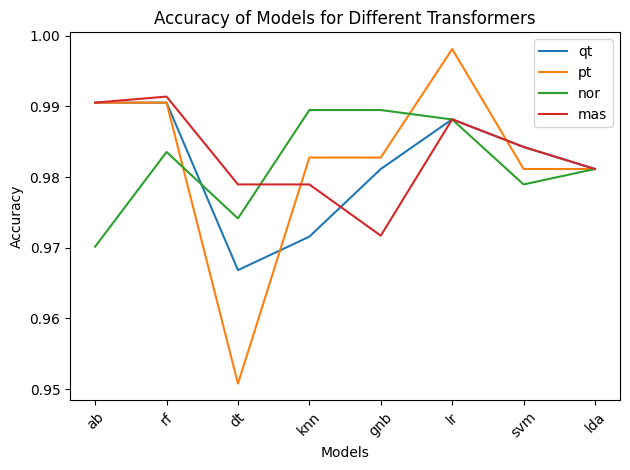

In [37]:
import matplotlib.pyplot as plt

# Sample data (replace this with your actual data)
transformers = ['qt', 'pt','nor','mas']
models = ['ab', 'rf', 'dt', 'knn', 'gnb', 'lr', 'svm', 'lda']




# Collecting accuracies for each transformer
accuracies = {}
for transformer in transformers:
    accuracies[transformer] = [globals()[f"accuracy_{transformer}_{model}"] for model in models]

# Plotting
fig, ax = plt.subplots()

for transformer in transformers:
    ax.plot(models, accuracies[transformer], label=transformer)

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy of Models for Different Transformers')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
